<a href="https://colab.research.google.com/github/jongpark2019/kbtu/blob/main/SGD_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SGD (Stocastic Gradient Descent) for Linear Regression
<p align="justify">In this practice, we introduce how to implement SGD (Stochastic Gradient Descent) algorithm with Python. The concept of gradient descent is illustrated on a very simple linear regression model. The linear regression model will be optimized using SGD algorithm in which the derivations of the gradients are provided.</p>

This is the part of the practice series on how to implement neural networks from scratch in Python:
- Stochastic gradient descent 
- Linear regression
- Logistic regression
- Neural Net and Backpropagation
- Vectorization 
- MLP (Multi-layer Perceptron)

## Theory of SGD

<p align="justify">Stochastic gradient descent (SGD) is an optimization algorithm for finding a minimum of a cost function by iteratively updating parameters of the cost function by a small amount calculated from the negative gradient of a given data set. The gradient is a derivative that shows the slope of a cost function. SGD is the most used optimization algorithms for many machine learning, and particularly deep learning models.
Let the cost function be $L(w)$ where w is the parameters of the cost function. $\frac{\partial L(w)}{\partial w}$ is the gradient of the cost function $L(w)$ with respect to the parameter $w$. SGD is expressed as the following formula: $w ← w - η∇L(w)$ where $∇L(w)= \frac{\partial L(w)}{\partial w}$ and $η$ is a learning rate. Note that $L(w)$, i.e, $\frac{\partial L(w)}{\partial w}$ is often denotated as $\Delta w$.
The algorithm for performing SGD is described below. <p>

**Algorithm** Stochastic gradient descent (SGD):
<ol type="1">
 <li> Initialize a learning rate η and parameter values </li> 
 <li> Get a set of mini-batches from the dataset, randomly </li>
 <li> Iterate over mini-batches of dataset </li>
      <ul type="disc">
        <li>Compute gradient estimates $∇L(w)$ </li>
        <li>Update all parameters using the formula $w ← w - η∇L(w)$ </li>
      </ul>
 <li> Go to Step 2 if a stopping criterion is not met </li>
</ol>

<p align="justify">A stopping criterion is to find a local or global minimum solution. It can be other constraint such as early stopping to avoid the overfitting, which will be explained subsequently. Note that in the literature [ ], the above SGD algorithm is defined as Mini-batch SGD. When the size of mini-batch in the above SGD algorithm is equal to one, it is defined as SGD. When the size of mini-batch is equal to the whole dataset, it is defined as batch gradient descent (BGD). However, the SGD optimization algorithm in the commercial deep learning platforms such as Keras, Pytorch, etc, actually means the Mini-batch SGD. <p>

## Example
<p align="justify">For the example of SGD, let’s try to predict the salary of employees based on the years of experience at a company. Table below shows the salaries of employees where x and y are years of working experience and salary, respectively. It is the dataset for the toy example. What would be the salary of employee with 5 years of experience ? This problem is known as regression. Note that regression is a statistical process for estimating the relationships among dependent and independent variables, and linear regression is a linear approach to modelling the relationship between variables. In this example, x is independant variable and y is dependant variable. 

| x (years)| y (salary, $1,000) | 
|:----------:|:-------------:|
| 2 |  20 | 
| 4 |  35 |  
| 6 |  50 |
| 8 |  85 |
| 10 |  100 |
| 12 |  110 |

</p>
<p align="justify">In order to demonstrate the SGD process, we employ the linear regression model: given N samples in a dataset $\{(x_i,y_i ):i=1,2,..,n\}$, find a function $h_w (x)$ that minimizes the cost (or loss) function $L(w)$, mean squared error (MSE), with $L(w)=  \frac{1}{2n} \sum_{i=1}^{n}(h_w (x_i )- y_i )^2 $. Here, the function $h_w (x)$ is called a hypothesis, and for the example, we define a simple linear function $h_w (x )= wx$, where  $w$ is a weight. We would like to find the value of $w$ which minimizes the cost function $L(w)$, based on the given dataset.</p>

<p align="justify">Below, we illustrate the SGD process, step by step. Let’s start by initializing the weight w = 0.001. and assign 0.1 to the learning rate $\eta$. The dataset is plotted at the figure below where x and y are years of experience and salaries of the employees, respectively. Note that for the computational efficiencly, the values of salaries and years are divided by 10 and 100, respectively.
</p>

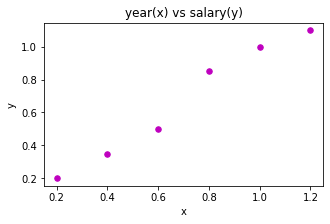

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset
dataset = np.array([[.2,  0.2],
                    [.4,  0.35],
                    [.6,  0.50],
                    [.8,  0.85],
                    [1.0, 1.00],
                    [1.2, 1.10]])
x = dataset[:, 0]
y = dataset[:, 1]
 
# Show the dataset
plt.figure(figsize=(5, 3))
plt.title('year(x) vs salary(y)')
plt.scatter(x, y, color = "m", marker = "o", s = 30)
plt.xlabel('x')
plt.ylabel('y')
plt.show()


## Minimizing the MSE loss function
<p align="justify"> Now, we want to optimize the model $h_w (x )= wx$ of the aforementioned example by adjusting the parameter $w$ so that the mean squared error (MSE) along all samples in the dataset is minimized. We apply the SGD (stochastic gradient descent) algorithm to obtain the optimal solution. The SGD works by taking the gradient of the loss function $L(w)$ with respect to the parameter $w$ at a specific position on the loss function, and updates the parameters in the direction of the negative gradient. The parameter $w$ is iteratively updated by taking steps proportional to the negative of the gradient:
$w ← w - η∇L(w)$. Here, $\nabla L(w)$ is defined as:
$$
\nabla L(w) = \frac{\partial L(w)}{\partial w}
$$
For notational simplification, let $o_i = h_w (x_i )$. In other words, $o_i$ is the predicted output for the sample input $x_i$. Then, 
$$
L(w)=  \frac{1}{2n} \sum_{i=1}^{n}(h_w (x_i )- y_i )^2 = \frac{1}{2n} \sum_{i=1}^{n}(o_i - y_i )^2 
$$
Using the chain rule of differential equation, $[g(h(x))]^{'}$ = $g^{'}(h(x))h^{'}(x)$,
$$
\frac{\partial L(w)}{\partial w} = \frac{1}{2n} \sum_{i=1}^{n}\frac{\partial (o_i - y_i )^2 }{\partial o_i}\frac{\partial o_i}{w}
$$
Here,
$$
\frac{\partial (o_i - y_i )^2 }{\partial o_i} = 2(o_i - y_i )
$$
And since $o_i = x_i w$, we can write ${\partial o_i}/{\partial w}$ as:
$$
\frac{\partial o_i}{\partial w} = \frac{\partial (x_i w)}{\partial w} = x_i
$$
Thus, the full update function $\frac{\partial L(w)}{\partial w}$ for the entire dataset becomes:
$$
\frac{\partial L(w)}{\partial w} = \frac{1}{2n} \sum_{i=1}^{n}2(o_i - y_i )x_i = \frac{1}{n} \sum_{i=1}^{n}(o_i - y_i )x_i
$$
Finally, we get: 
$$
\nabla L(w) =  \frac{1}{n} \sum_{i=1}^{n}(o_i - y_i ) x_i
$$
Note that $(o_i - y_i ) x_i$ is the gradient for the sample $i$. This formula is actually for the batch gradient descent where all the gradients are caculated and summed up before updating the parameter $w$. In other words, the entire elemets of the dataset needs to be cycled for a single parameter update. In contrast to is batch gradient descent (BGD), the SGD takes a single data sample and perform thea parameter update at each iteration, as descried before.

Below, we have implemented the gradient descent agorithm with Python. </p>


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(45) # set the seed value

def h(x, w):
    """Hypothesis function h(x) = x * w"""
    return x * w

def loss(o, y):
    """MSE loss function"""
    return np.mean((o - y)**2) / 2.0

def gradient(x, w, y):
    """Gradient function"""
    return x * (h(x, w) - y)

 
def gradient_descent(k, lr=0.7):
    """ Gradient descent optimization
        where batch size is equal to input data.
    """

    # Initialize weight and learning rate
    w = 0.05  # Initialize weight
    eta = lr # learning rate

    # Perform the gradient descent optimization
    n_iter = k  # Set the number of iterations for gradient descent updates
    w_loss = [(w, loss(h(x, w), y))] # Keep track of weight and loss values

    for i in range(n_iter):
        dw = np.mean(gradient(x, w, y)) # Calcuate gradient of loss at w, i.e., dw = Δw, i.e., ∇L(w) 
        w = w - eta* dw  # Update the weight parameter
        w_loss.append((w, loss(h(x, w), y)))  # Store the weight and loss

    return w, w_loss

if __name__ == "__main__":
  
    # Dataset
    dataset = np.array([[.2,  0.2],
                        [.4,  0.35],
                        [.6,  0.50],
                        [.8,  0.85],
                        [1.0, 1.00],
                        [1.2, 1.10]])
    x = dataset[:, 0]
    y = dataset[:, 1]

    w, w_loss = gradient_descent(5)
    print(f'The value of parameter w:{w: .4f}')

The value of parameter w: 0.8989


<p align="justify">First, the learning rate $η$ and weight $w$  are initialized with 0.7 and 0.05, respectively. These values can be changed so that the paramter $w$ can be inilialized with random values. Typically, the value of learning rate should be between 0 and 1. The function gradient_descent() performs the batch gradient descent algorithm. The number of iteration is set to 5. For each iteration, the gradients over the entire dataset (here only 6 samples) are calculated and summed up. Then, the parameter  $w$  is updated. The function h(w,x) implements the hypothes function $h_w(x)$ and the function loss implements the loss function $L(w)$. The function gradient() calculates the gradient of the loss at  $w$  for each sample. After 4 iterations we obtained the value of the parameter $w$  with 0.8989. Note that in calculating the function h(w,x), x is a vecor and w has a scalar value, so that wx is calculated by multiplying vector x and scalar w.</p>

## Visualizing the gradient descent optimization 
<p align="justify">We want to show how the optimal value of the paramter $w$ is obtained, if it exists. In order to do that, the value of loss function $L(w)$ with respect to $w$ are kept track of and and stored in w_loss at gradient_descent function in the above program. The function display_weight_loss plots the loss for the given weight. Note that w_loss is obtained in gradient_descent function described above.
The IPython notebook file at <a rel="canonical" href="https://peterroelants.github.io/posts/neural-network-implementation-part01/">peterroelants.github.io</a> is referred for the code.</p>

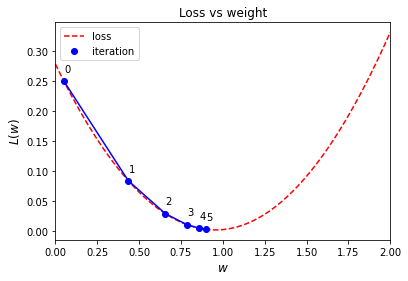

Iteration(0): weight:0.0500 	 loss: 0.2505
Iteration(1): weight:0.4348 	 loss: 0.0839
Iteration(2): weight:0.6561 	 loss: 0.0288
Iteration(3): weight:0.7835 	 loss: 0.0105
Iteration(4): weight:0.8568 	 loss: 0.0045
Iteration(5): weight:0.8989 	 loss: 0.0025


In [ ]:
def display_weight_loss(w_loss):
    """ Plot the loss for the given weight"""
    
    # Define weight values for plotting the loss
    weights = np.linspace(0, 2, num=100)  

    # Calculate the loss for each weight in weights 
    loss_ws = np.vectorize(lambda w: loss(h(x, w) , y))(weights)

    # Visualise the gradient descent optimization by plotting loss vs weight
    plt.figure(figsize=(6, 4))
    plt.plot(weights, loss_ws, 'r--', label='loss') 
    # Plot the gradient updates
    for i in range(0, len(w_loss)-1):
        x1, y1 = w_loss[i]
        x2, y2 = w_loss[i+1]
        plt.plot(x1, y1, 'bo')
        plt.plot([x1, x2],[y1, y2], 'b-')
        plt.text(x1, y1+0.015, f'${i}$')
    plt.plot(x2, y2, 'bo', label='iteration')
    plt.text(x2, y2+0.015, f'${i+1}$')
    # Show figure
    plt.xlabel('$w$', fontsize=12)
    plt.ylabel('$L(w)$', fontsize=12)
    plt.title('Loss vs weight')
    plt.xlim(0, 2)
    plt.legend(loc=0)
    plt.show()

display_weight_loss(w_loss)
# Print the final values of weight and loss
for i in range(0, len(w_loss)):
    print('Iteration({}): weight:{:.4f} \t loss: {:.4f}'.format(i, w_loss[i][0], w_loss[i][1]))


<p align="justify">By increasing the number of iterations, we can get the optimal value of weight while minimizing the loss. At 20 iterations, the optimal weight is 0.9560. Applying this weight value to the linear regression model $h_w (x )= wx$, we can precict that the salary of employee with 5 years of experience is 47,800 dollars.</p>  

In [ ]:
n_iter = 20 # number of iterations
w, _ = gradient_descent(n_iter)
print(f'Weight value at iternation {n_iter}: {w: .4f}')

Weight value at iternation 20:  0.9560


<p align="justify"> The above figure shows the gradient descent updates where the line with blue dots shows the trajectory of changing loss values at iterations from 0 to 5. As the numuber of iternations increases, which is indicated by the integer above the blue dot, the value of loss function decreases. In the graph, the first update is larger than the second update because the gradient (and slope) is higher. As you approach the minimum, they become lower, so that it is called gradient descent. The dotted red curve indicates the trajectory of the loss function $L(w)$. We know that there exists an optimal value, and it is around $w$ value of 1.0. So, the $w$ value of 0.8989 achieved with 5 iterations is very close to the optimal value. By increasing the number of iterations, we can get the parameter value $w$ which is closer to the optimum. For example, with 20 iterations, the weight value is 0.9560. You can find that it is actually an optimal value of the parameter $w$, because the loss reduces no more as the number of iterations increases beyond 20. It shows that the gradient descent algorithm quickly converges to the optimal value around 1.0. 

For a simple loss function like in this example, we can easily find what the optimal value of the weight parameter should be. However, in most other cases with high dimentional parameters, it is usually very difficult to find the optimal value. </p>

### Exercise: Implement a online gradient descent algorithm where the weight is updated for each new sample. Display the w_loss for 5 iterations. Note that for each iteration, new data simple is trained. 

The value of parameter w: 0.8981


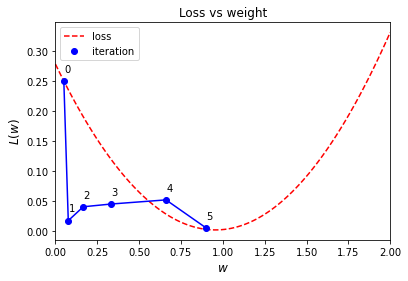

In [ ]:
# Solution
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(45) # set the seed value

def h(x, w):
    """Hypothesis function h(x) = x * w"""
    return x * w

def loss(o, y):
    """MSE loss function"""
    return np.mean((o - y)**2) / 2.0

def gradient(x, w, y):
    """Gradient function"""
    return x * (h(x, w) - y)

 
def online_gradient_descent(k, lr=0.7):
    """ Online gradient descent update algorithm
        where each new data sample is trained.
    """

    # Initialize weight and learning rate
    w = 0.05  # Initialize weight
    eta = lr # learning rate

    # Perform the gradient descent optimization.
    n_iter = k  # Set the number of iterations for gradient descent updates
    w_loss = [(w, loss(h(x, w), y))] # Keep track of weight and loss values

    # This part implements the online gradient descent optimization.
    for i in range(n_iter):
        dw = np.mean(gradient(x[i: (i+1)], w, y[i: (i+1)])) # Calcuate gradient of loss at w for each new data sample
        w = w - eta* dw  # Update the weight parameter
        w_loss.append((w, loss(h(x[i: (i+1)], w), y[i: (i+1)])))  # Store the weight and loss for each new data sample

    return w, w_loss

if __name__ == "__main__":
  
    # Dataset
    dataset = np.array([[.2,  0.2],
                        [.4,  0.35],
                        [.6,  0.50],
                        [.8,  0.85],
                        [1.0, 1.00],
                        [1.2, 1.10]])
    x = dataset[:, 0]
    y = dataset[:, 1]

    w, w_loss = online_gradient_descent(5)
    print(f'The value of parameter w:{w: .4f}')

    display_weight_loss(w_loss)

## Impact of learning rate in Stochastic Gradient Descent
<p align="justify"> In stochastic gradient descent, choosing a proper value of the learning rate is challenging task because different learning rate values can significantly affect the behavior of gradient descent. If the learning rate is set too low, training will progress very slowly as it makes very tiny updates to the weights. However, if the learning rate is set too high, it may cause unacceptable divergent behavior in the loss function. Below, we illustrate three cases of learning rate: low, high, and too high. There are many ways to set a proper value of the learning rate. Typically, you may try a few different values and see which one gives you the best loss without sacrificing speed of training. </p>









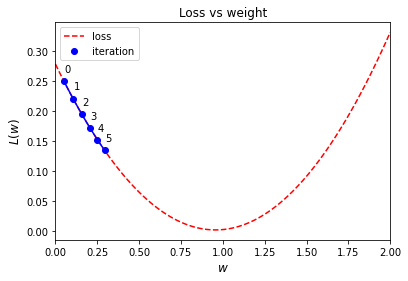

Iteration(0): weight:0.0500 	 loss: 0.2505
Iteration(1): weight:0.1050 	 loss: 0.2212
Iteration(2): weight:0.1566 	 loss: 0.1954
Iteration(3): weight:0.2051 	 loss: 0.1726
Iteration(4): weight:0.2507 	 loss: 0.1524
Iteration(5): weight:0.2934 	 loss: 0.1347


In [ ]:
n_iter = 5 # number of iterations
w, w_loss = gradient_descent(n_iter, 0.1)
display_weight_loss(w_loss)

# Print the final values of weight and loss
for i in range(0, len(w_loss)):
    print('Iteration({}): weight:{:.4f} \t loss: {:.4f}'.format(i, w_loss[i][0], w_loss[i][1]))

<p align="justify">In the first case with low learning rate, the learning rate is set to 0.1 for the simple linear regression example which is described previously. The number of iterations is set 5, the same as before. The figure shows that the changes in the weight $w$  are very small due to the small learning rate. A small learning rate requires many updates before reaching to the mimimum, resulting in very slow convergence. If the number of iterations is limited, the SGD algorithm may return before the minimum is found.</p>

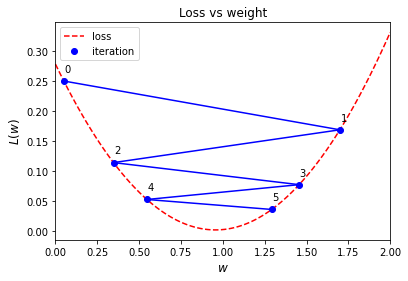

Iteration(0): weight:0.0500 	 loss: 0.2505
Iteration(1): weight:1.6990 	 loss: 0.1689
Iteration(2): weight:0.3468 	 loss: 0.1141
Iteration(3): weight:1.4556 	 loss: 0.0772
Iteration(4): weight:0.5464 	 loss: 0.0524
Iteration(5): weight:1.2920 	 loss: 0.0357


In [ ]:
n_iter = 5 # number of iterations
w, w_loss = gradient_descent(n_iter, 3)
display_weight_loss(w_loss)

# Print the final values of weight and loss
for i in range(0, len(w_loss)):
    print('Iteration({}): weight:{:.4f} \t loss: {:.4f}'.format(i, w_loss[i][0], w_loss[i][1]))

<p align="justify">In the second case with high learning rate, the learning rate is set to 3.0 for the same example of the first case. The figure shows that the changes in the weight $w$  are larege due to the large learning rate. The value of the weight $w$ approaches in a zigzag way to the optimal value of w. This zigzag movement also requires many updates to get to the mimimum. Notice that the weight values moves in the zigzag around the optimal value of $w$. </p>

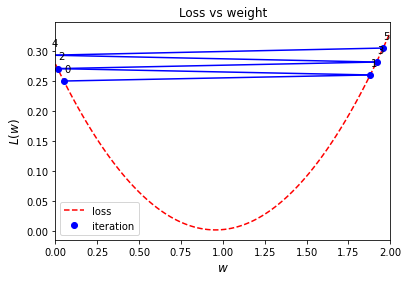

Iteration(0): weight:0.0500 	 loss: 0.2505
Iteration(1): weight:1.8804 	 loss: 0.2607
Iteration(2): weight:0.0130 	 loss: 0.2712
Iteration(3): weight:1.9181 	 loss: 0.2823
Iteration(4): weight:-0.0255 	 loss: 0.2937
Iteration(5): weight:1.9574 	 loss: 0.3056


In [ ]:
n_iter = 5 # number of iterations
w, w_loss = gradient_descent(n_iter, 3.33)
display_weight_loss(w_loss)

# Print the final values of weight and loss
for i in range(0, len(w_loss)):
    print('Iteration({}): weight:{:.4f} \t loss: {:.4f}'.format(i, w_loss[i][0], w_loss[i][1]))

<p align="justify">In the third case with too high learning rate, the learning rate is set to 3.33 for the same example of the first case. The figure shows that too high value of a learning rate causes drastic weight updates which lead to divergent behaviors. Values of both loss and weight diverge and you can see their diverging values as the number of interations increases. This is an unacceptable behavior that shoud be avoided. Usually, if the learning rate is larger than 1, more weight is given to the gradient of the loss function than to the current value of the weight parameters, so that the loss function tends to diverge. </p>

## Mini-batch in Stochastic Gradient Descent
<p align="justify">Stochastic gradient descent randomly divides the datset into mini-batches. For each minibatch, the gradient is computed and all parameters are updated. Once all mini-batches are used, the iteration or epoch is finished and start the next iteration until the stopping criteria are met. The stopping criteria usually checks for the convergence. At each iteration, the learning rate can also be adjusted.
Below, we have implemented the SGD algorithm which is descibed above. A new function called SGD() is built, that is very similar to the function gradient_descent() but uses randomly selected mini-batches for weight updates.
We have a new hyperparameter batch_size which defines the number of samples for each mini-bactch. The size of mini-batch is an important hyperparameter for stochastic gradient descent that can affect the performance such as the convergene time. For this simple example, batch_size can be 1, 2, 3, and 6. In order to select mini-batches randomly, The function np.ramdom.shuffle() is used to shuffle the samples in the dataset. This is one of the ways to select mini-batches randomly.

</p>

The value of parameter w: 0.9528


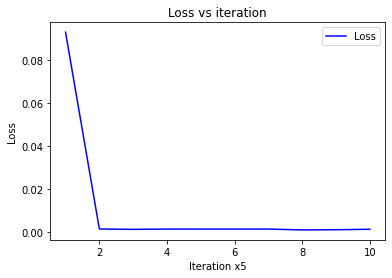

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(45) # set the seed value

def h(x, w):
    """Hypothesis function h(x) = x * w"""
    return x * w

def loss(o, y):
    """MSE loss function"""
    return np.mean((o - y)**2) / 2.0

def gradient(x, w, y):
    """Gradient function"""
    return x * (h(x, w) - y)

def SGD(dataset, n_iter):
    """ Mini-batch gradient descent optimization
    """

    # Initialize learning rate and weight 
    eta = 0.5 # learning rate
    w = 0.05  # Initialize weight

    # SGD Optimization: perform the mini-batch stochastic gradient descent optimization
    for i in range(n_iter):

        np.random.shuffle(dataset) # Randomize the dataset
        x = dataset[:, 0] # Get the input data
        y = dataset[:, 1]# Get the target data
        loss_sum = 0  

        for j in range(num_batch): # Iterate over mini-batches of dataset
            x_batch = x[batch_size * j: batch_size * (j+1)]    # Get a mini-batch of input data x
            y_batch = y[batch_size * j: batch_size * (j+1)]   # Get a mini-batch of target data y
            dw = np.mean(gradient(x_batch, w, y_batch)) # Compute gradient estimates ∇L(w) 
            w = w - eta* dw  # Update parameters using the formula  w←w−η∇w
            loss_sum += loss(h(x_batch, w), y_batch) # Sum up losses of mini-batches 

        if (i % 5) == 0:
            loss_avg.append(loss_sum / num_batch) # Get average of mimi-batch loss

    return w, loss_avg
            
if __name__ == "__main__":
  
    # Dataset
    dataset = np.array([[.2,  0.2],
                        [.4,  0.35],
                        [.6,  0.50],
                        [.8,  0.85],
                        [1.0, 1.00],
                        [1.2, 1.10]])

    batch_size = 3  # Size of mini-batch data
    num_batch = int(dataset.shape[0]/batch_size)  # Number of mini-batches
    loss_avg = [] # Loss average
  
    w, loss_avg = SGD(dataset, 50)

    print(f'The value of parameter w:{w: .4f}')

    # Show the average loss of mini-batch
    plt.figure(figsize=(6, 4))
    iter_count = range(1, len(loss_avg) + 1)
    plt.plot(iter_count, loss_avg, 'b-')
    plt.title('Loss vs iteration')
    plt.legend(['Loss'])
    plt.xlabel('Iteration x5')
    plt.ylabel('Loss')
    plt.show()


<p align="justify"> In the above SGD code, the inner for loop is repeated for each set of minibatches. The main difference from the function gradient_descent() described above is that the gradient is calculated for the samples in a minibatch, i.e., x_batch and y_batch, instead of for all samples x and y. The performance is measured with average loss of mini-batch per iteration. The average loss is calculated, every 5 iterations. 
The performance shows that the loss drastically reduces to near zero afer 20 iterations, where the optimal value of weight is 0.9528. You can test the performance of SGD by varing the batch size. If the batch_size is set 6, i.e., with BGD, the result will be the same as you got with gradient_descent(). If the batch_size is set 1, it is called as stochastic gradient descent (SGD). Between batch_sizes 1 and 6, there can be two batch_sizes possible: 2 and 3, which corresponds to Mini-batch SGD. 
In setting mini-batch size, larger mini-batches is more  computationally more expensive, less frequent updates, lower gradient variance, and more parallelizable. SGD with larger batch size may generalize more poorly  <a rel="canonical" href="https://arxiv.org/pdf/1609.04836.pdf">keska.et.al</a>, but can be made to work well by carefully controlling the learning rate and other optimization technique  <a rel="canonical" href="https://arxiv.org/pdf/1609.04836.pdf">goyal.et.al.</a>

In Exercise, you can compare the performance of SGD, Mini-batch SGD, and BGD by varing the batch size.</p>

### Exercise: Compare loss and weight for differenct mini-batch sizes: 1, 2, 3, 6.

###Exercise: With the simple example described above, get the optimal solution analytically, and compare the analytic solution with the optimal solution obtained by SGD.

Optimal weight:  0.9714


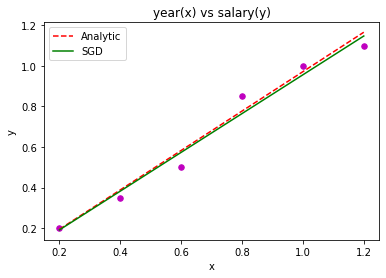

In [ ]:
# Analytic solution: calculate the optimal weight analytically

import numpy as np
import matplotlib.pyplot as plt
 
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
 
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
 
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x 
    
    # calculating regression coefficients
    w = SS_xy / SS_xx  
    return w 
 
def plot_regression_line(x, y, w):
 
    # predicted response vector
    y_analytic =  w*x 
    y_sgd = 0.9560*x

    plt.figure(figsize=(6, 4)) 
    plt.scatter(x, y, color = "m",  marker = "o", s = 30)
    plt.title('year(x) vs salary(y)')
   # plotting the regression line
    plt.plot(x, y_analytic, 'r--', label='Analytic')    
    plt.plot(x, y_sgd, color = "g", label='SGD')
    plt.legend(loc=0)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

def main():
    # dataset
    dataset = np.array([[.2,  0.2],
                        [.4,  0.35],
                        [.6,  0.50],
                        [.8,  0.85],
                        [1.0, 1.00],
                        [1.2, 1.10]])

    x = dataset[:, 0]
    y = dataset[:, 1]
 
    # estimating coefficients
    w = estimate_coef(x, y)
    print(f'Optimal weight: {w: .4f}')  
 
    # plotting regression line
    plot_regression_line(x, y, w)
 
if __name__ == "__main__":
    main()

## Exercise
Implement a multiplier by chainging the dataset of the linear regression code described above. The multiplier that you are going to build only gives answers to multiple of 3 between 1 and 10,000: 3x1, 3x2, .... 3x10,000. Hint: you only need two values to build the multiplier: the lowest and the largest numbers.

##SGD in Keras, Pytorch and other deep learning platforms
<p align="justify">As mentioned before, stochastic gradient descent(SGD) used in open deep learning platform actually implements a mini-batch SGD, since it is a general form of SGD. SGD is widely used to train neural networks. It is known that SGD has trouble navigating ravines, where it oscillates across the slopes of the ravine, and progressing slowly down to the minimum point[ ]. It has other limitation such as getting trapped in saddle point of search space[ ].There have been developed many optimization techniques to overcome these SGD limitations, which include Adam, Adagrad, Adadelta and RMSProp. The deep learning libraries for neural networks such as Keras, Pytorch and others often have different variants of SGD optimization algorithm. These optimization libraries are usually called internally when neural network software is trained. However, you can use them independently as well.
</p>